# 机器学习纳米学位
猫狗大战毕业项目   
张斌   
 
2019年3月14日   

## I. 问题的定义

### 项目概述

本项目为kaggle竞赛项目，是要训练⼀个机器学习模型， 最终输入⼀张图片来分辨图像中狗的概率（1 =狗，0 =猫）。本项目是⼀个典型的计算机视觉问题中的图像⼆分类问题。计算机视觉是一门研究如何使机器“看”的科学，是指用摄影机和电脑代替人眼对目标进行识别、跟踪和测量等机器视觉，并进一步做图形处理，使电脑处理成为更适合人眼观察或传送给仪器检测的图像。作为一个科学学科，计算机视觉研究相关的理论和技术，试图建立能够从图像或者多维数据中获取‘信息’的人工智能系统。计算机视觉是一门综合性的学科，在工业、医疗、交通等方便逐渐的在大显身手，其中包括：图片识别分析、人脸识别、文字识别、视频监控分析、图像及视频编辑、工业视觉检测、医疗图像检测、智能驾驶等。在不断的研究中也形成了多个优秀的数据集，包括：MNIST、ImageNet、PASCALVOC等，这些优秀的数据在不同的方面为计算机视觉识别的训练起到了至关重要的的作用。本次涉及到的的数据集ImageNet，是一个用于视觉对象识别研究的大型可视化数据库。超过1400万的图像URL被ImageNet手动注释，以指示图片中的对象;在至少一百万个图像中，还提供了边界框。ImageNet包含2万多个类别，在这个强大的数据集训练出的模型基础上，利用迁移学习，完成本次项目的开发研究。本项目使用卷积神经网络CNN，卷积神经网络是深度学习技术中极具代表的网络结构之⼀，在图像处理领域取得了很大。本项目的输入集是由“Dogs vs. Cats Redux: Kernels Edition”项目提供的训练集和测试集，通过利用kaggle下载的训练集图片，利用CNN网络对图片进行多次积层和池化层处理，在输出层进行sigmoid计算得到两个类别各自的概率，通过损失函数的值对模型的各个参数进行调整，不断的评分，不断的调整，最终训练出优秀的模型。利用最终的模型，对测试集中的每个图像，预测图像是狗的概率（1 =狗，0 =猫）。  

### 问题陈述
这次需要解决的问题是：    
本项目是⼀个典型的计算机视觉问题中的图像⼆分类问题。通过利用计算机图像识别技术，对kaggle提供的训练集数据利用CNN的方式进行分析学习训练出优秀的图像识别模型，利用图像识别模型对测试集中的图片进行预测，预测图像是狗或猫的概率，并将结果存入submission.csv文件中，上传至kaggle进行打分。   
1、首先将对数据集中的图片进行筛选，利用箱型图原理，剔除异常的图片，主要包含低分辨率和错误的图片。     
2、建立训练集和验证集。   
3、由于神经网络输入点图像的维度和像素是固定的，通过对图像进行预处理，统一图像的维度和大小。
4、在图片输入模型前进行归一化处理。
4、利用迁移学习，使用开源的优秀的图像识别模型并加载权重作为固定的图像特征提取器，利用多个具有优秀权重的识别模型对数据进行预处理，观察各自的预测结果的准确率和多个模型联合起来的预测结果准确率。   
5、结合迁移学习的模型，建立CNN的数据模型。      
6、对CNN模型进行训练，得到最优的模型。   
7、利用模型预测测试集中的图像是狗的概率，将结果按照要求存入submission.csv文件中。   
期望的结果是训练出的模型可以准确的识别出图像是狗还是猫，并在kaggle上得到优秀评分。   

### 评价指标
kaggle的评估标准是log损失函数，以下为表达式：   
$LogLoss = -\frac{1}{n}\sum_{i=1}^n [y_ilog(\hat{y}_i)+(1-y_i)log(1- \hat{y}_i)]$

其中：   
n 是测试集中图片数量。   
$\hat{y}_i$是图片预测为狗的概率。   
${y}_i$如果图像是狗，则为1，如果是猫，则为0。   
$log()$是自然对数。   
对数损失越小，代表模型的性能越好。    

交叉熵是分类问题中常用的损失函数，被广泛应用。
我使用的评估指标是kaggle提出了，首先保证的评估指标的适用性。以上计算公式摘自kaggle“Dogs vs. Cats Redux: Kernels Edition”项目。

## II. 分析

### 数据的探索
此数据集来自kaggle“Dogs vs. Cats Redux: Kernels Edition”项目。全部解压后包括：train、test、sample_submission.csv。    
![title](img/1.jpg)
train文件夹中包含25000 张猫狗的图片，每张图片的名字为“类型+序号.jpg”，此文件夹为训练集，用训练集图片对模型进行训练，根据图片的名称可以定义图片中的内容为猫或狗。   

 ![title](img/2.jpg)
test文件夹中包含12500张猫狗的图片，每张图片的名字为“序号.jpg”，此文件夹为测试集，利用算法模型预测测试集中图片的内容（即图片中是狗的概率），并将结果存入submission.csv。     
sample_submission.csv文件为submission.csv的示范文件，submission.csv按照示范文件的标准将模型预测的测试集中图片是狗的概率和图片序号一一对应填入，最终上传至kaggle打分。   

In [4]:
files = glob('data/train/*')

In [5]:
test_files = glob('data/test/*')

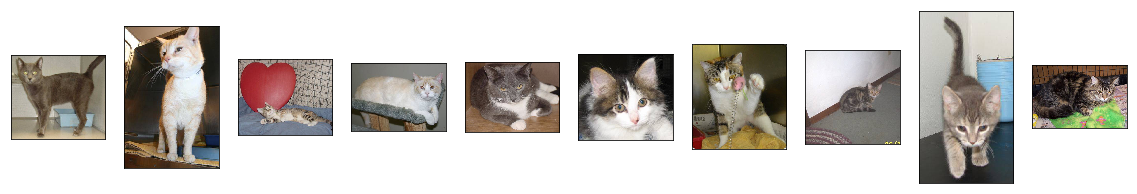

In [4]:
fig = plt.figure(figsize=(20,10))
for i, val in enumerate(files[50:60]):
    ax = fig.add_subplot(1, 10, i + 1, xticks=[], yticks=[])
    abnormal_img = Image.open(val) 
    # 异常图片名称,待添加
    ax.imshow(abnormal_img)

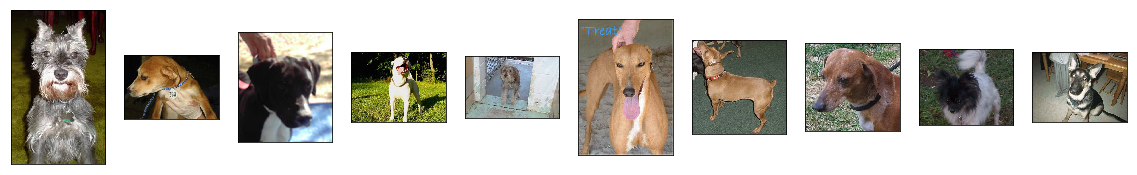

In [6]:
fig = plt.figure(figsize=(20,10))
for i, val in enumerate(files[12510:12520]):
    ax = fig.add_subplot(1, 10, i + 1, xticks=[], yticks=[])
    abnormal_img = Image.open(val) 
    # 异常图片名称,待添加
    ax.imshow(abnormal_img)

以上为kaggle“Dogs vs. Cats Redux: Kernels Edition”项目提供的部分数据内容。在简略查看全部图片后，发现图片主要是猫和狗的图像，也掺杂少数人类、广告、手绘等图片；图片大部分日常拍摄，所以有少数拍摄的质量不是很高，光照条件不好，图片模糊，这点需要注意；猫狗的比例在训练集中根据文件名的标识分类，大致是1:1。

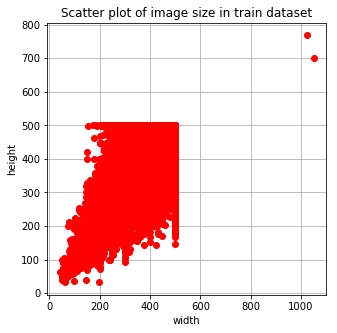

In [21]:
scatter_plot(files, 'train')

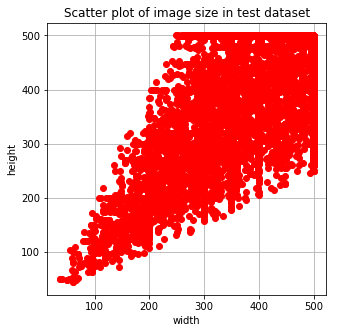

In [22]:
scatter_plot(test_files, 'test')

kaggle提供的train和test中的图片，以上是图片长宽的散点图，上图说明图片的大小有一定差别，需要在输入模型前统一大小，并且有些图片的像素相比其他图片是过于低的，这也进一步说明有少数的图片是模糊的，这个也应引起注意。   
kaggle提供的数据集中，应重点关注训练集train中异常的图片，主要包括分辨率过低，图片大小太小等。对train中所有的图片进行图像直方图分析，对图片中包含的色彩与图片的像素的比值进行分析，此次利用箱型图原理，显示一组数据分散情况，箱形图为我们提供了识别异常值的一个标准：异常值被定义为小于Q1－1.5IQR或大于Q3+1.5IQR的值，从而筛选出异常值，并剔除。以下是箱型图和异常值，圆圈代表异常值，我们应该对异常值进行剔除。通过箱型图原理判断的异常值总共220张。

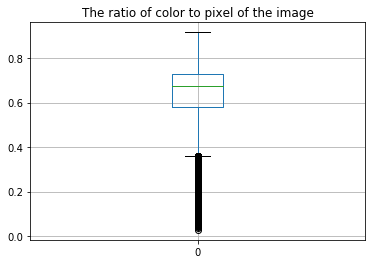

In [12]:
df = pd.DataFrame(color_pixel_ratio_list)
f = df.boxplot()  # 返回类型为字典
plt.title('The ratio of color to pixel of the image')
plt.show()

In [ ]:
# # 异常图片list
# abnormal_pic_list = []
# for key, value in color_pixel_dict.items():
#     # 判断小于异常值
#     if key < abnormal_1:
#         # 加入异常pic列表中
#         abnormal_pic_list.append(value)
#         # 打开异常pic，并展示
        
#     # 判断大于异常值
#     if key > abnormal_2:
#         # 加入异常pic列表中
#         abnormal_pic_list.append(value)
        
# # 输出所有异常picture        
# print('异常图片的数量为：' + str(len(abnormal_pic_list)) + '张')
# # 显示异常图片


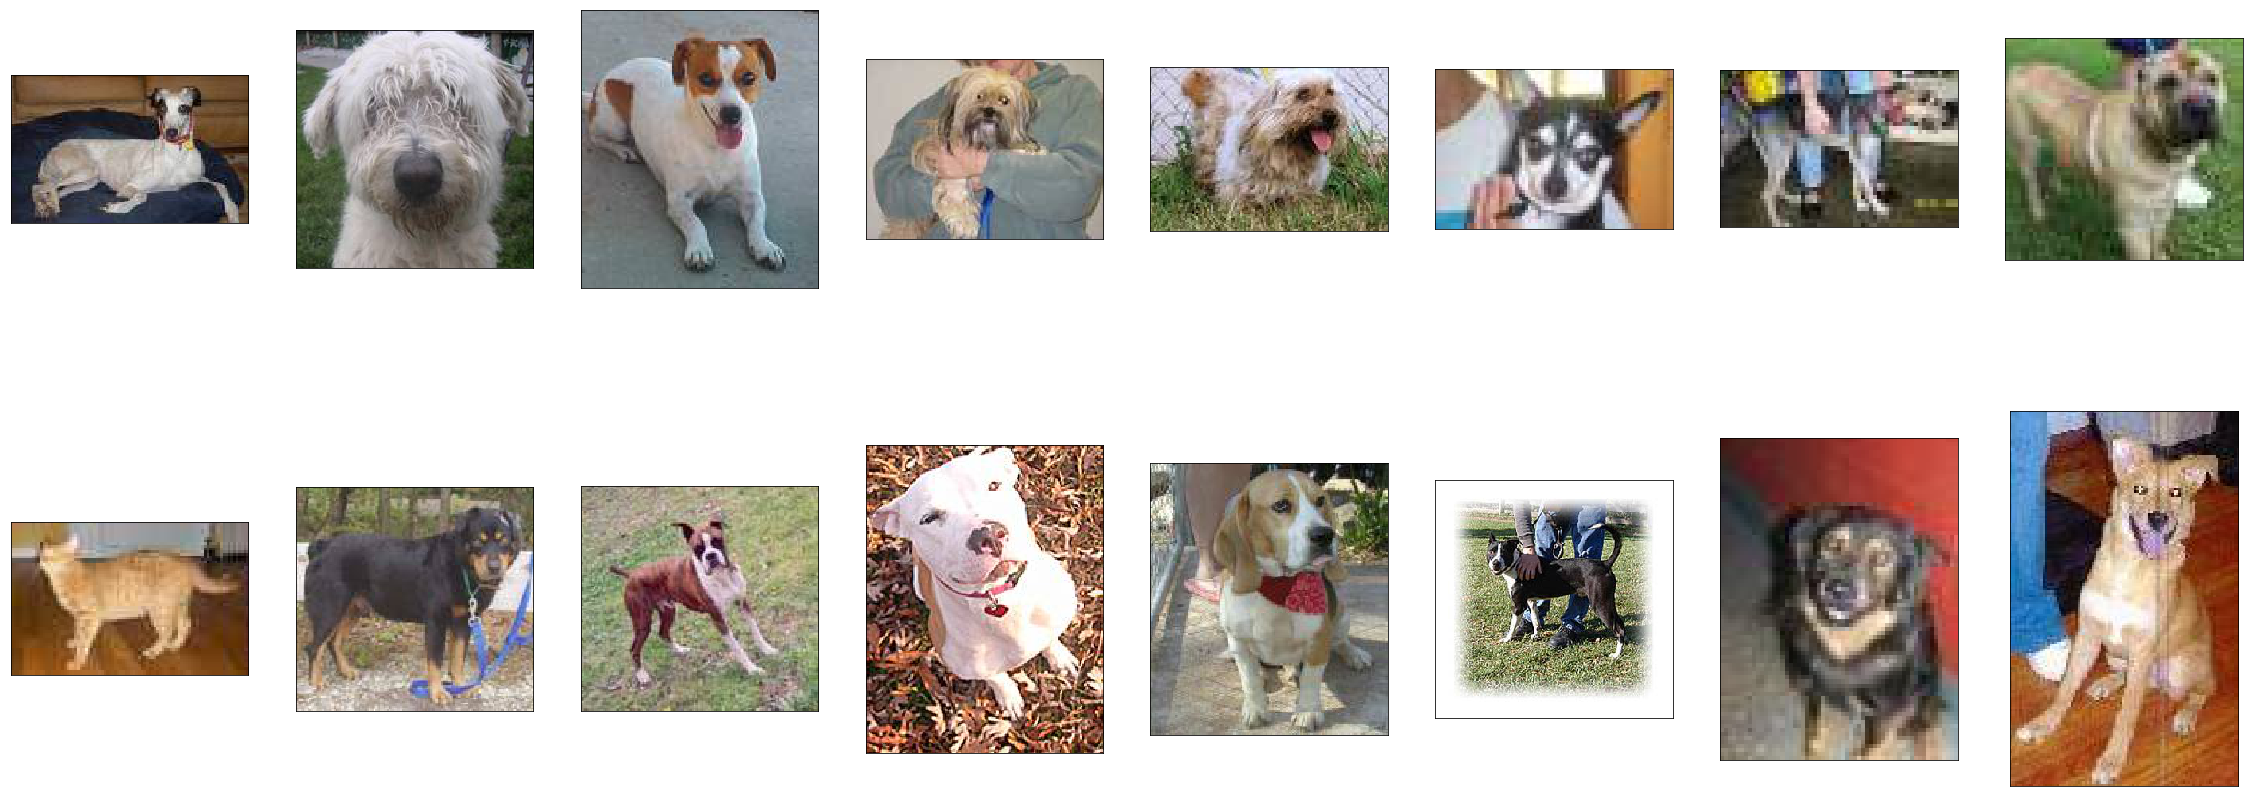

In [12]:
fig = plt.figure(figsize=(40,40))
for i, val in enumerate(abnormal_pic_list[:16]):
    ax = fig.add_subplot(5, 8, i + 1, xticks=[], yticks=[])
    abnormal_img = Image.open(str(val)) 
    # 异常图片名称,待添加
    ax.imshow(abnormal_img)

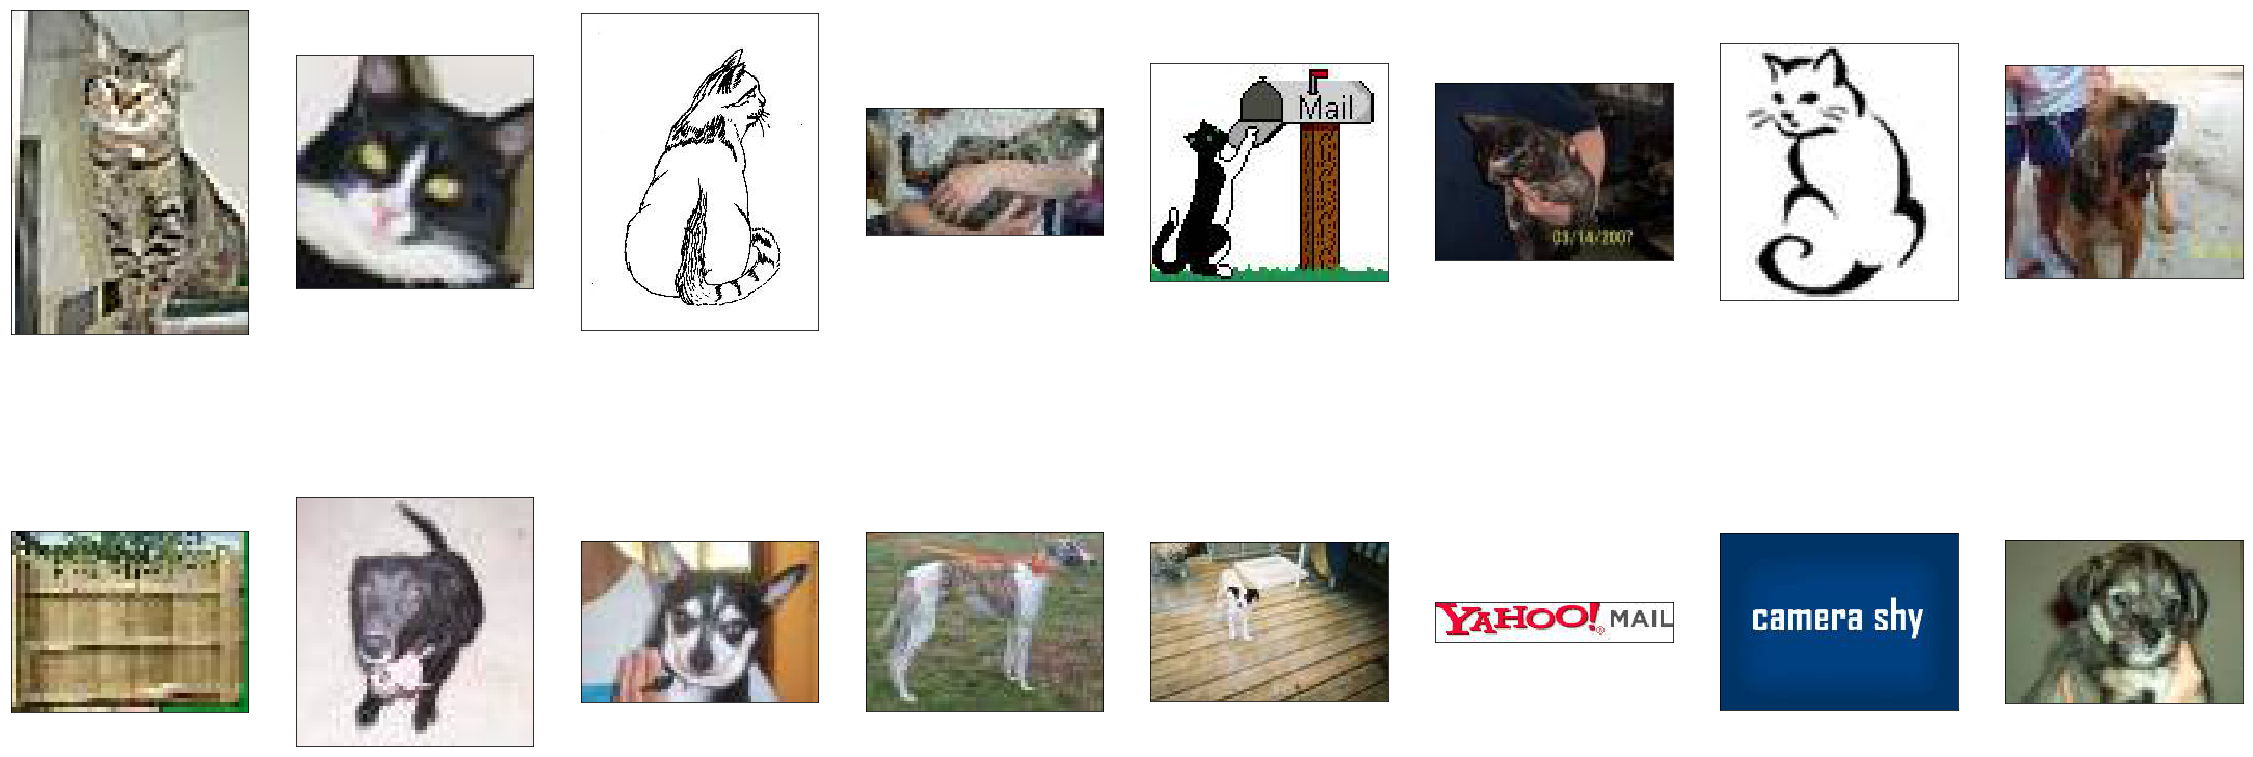

In [13]:
fig = plt.figure(figsize=(40,40))
for i, val in enumerate(inin['inin'][:-7]):
    ax = fig.add_subplot(5, 8, i + 1, xticks=[], yticks=[])
    abnormal_img = Image.open('data/train/' + str(val)) 
    # 异常图片名称,待添加
    ax.imshow(abnormal_img)

以上为判断为异常值的部分图片，其中也包含一些正常的图片，可以看到用箱型图存在相当的误判，此处参考[毕业设计 Dogs vs Cats For Udacity P7 (异常值检验)](https://zhuanlan.zhihu.com/p/34068451?edition=yidianzixun&utm_source=yidianzixun&yidian_docid=0IQskNR8)中预处理模型的方式精细筛选异常图片，此处选用了ImageNet数据集训练出的模型和权重文件，根据参考文献中的实验，计划选用Xception、InceptionResNetV2和Inception V3共同完成异常数据检测。
      

### 算法和技术
对给定的图片，计算机识别图片的内容，预测出图像属于预先定义类别中的哪⼀类，属于计算机视觉领域，本项目是二分类的问题，目前解决这类问题的核心技术框架是深度学习，针对图像类型的数据，深度学习中的卷积神经网络架构CNN又性能突出,卷积神经网络是一类包含卷积计算且具有深度结构的前馈神经网络，卷积神经网络能够进行平移不变分类，因此也被称为“平移不变人工神经网络。CNN网络层级结构主要有5个层级结构：
 - 1.输入层
 - 2.卷积层
 - 3.激活层
 - 4.池化层
 - 5.全连接层   
**输入层**   
卷积神经网络的输入层可以处理多维数据，接收外部传入数据的一层，由于使用梯度下降进行学习，卷积神经网络的输入特征需要进行标准化处理。   
**卷积层**   
使用卷积核进行特征提取和特征映射。   
**激活层**   
所谓激活，实际上是对卷积层的输出结果做一次非线性映射。如果不用激活函数，这种情况下，每一层的输出都是上一层输入的线性函数。   
**池化层**   
在卷积层进行特征提取后，输出的特征图会被传递至池化层进行特征选择和信息过滤。池化层包含预设定的池化函数，其功能是将特征图中单个点的结果替换为其相邻区域的特征图统计量，池化的功能是不断降低维数，以减少网络中的参数和计算次数。这缩短了训练时间并控制过度拟合。   
**全连接层**   
卷积神经网络中的全连接层等价于传统前馈神经网络中的隐含层。全连接层通常搭建在卷积神经网络隐含层的最后部分，并只向其它全连接层传递信号。特征图在全连接层中会失去3维结构，被展开为向量并通过激活函数传递至下一层或输出层。   

![title](img/3.jpg)

输入层读入图像作为网络的数据输入，经过多个卷积层、激活层、池化层卷积后，神经网络主要是对图片的特征向量进行抽取，最后进入全连接层判断对象的类别，因此可以利用已经训练好的卷积神经网络提取图片中复杂的几何特征，即将原始图片用已经训练好的卷积神经网络处理之后的输出，作为新的输入，然后加上定制的全连接层，去进行分类。在模型训练的过程中，只改变新加的全连接层的权重，对模型进行优化。卷积神经网络是⼀种特殊的神经网络结构，可以通过卷积操作实现对图像特征的优化提取，提炼视觉特征提供图像分类的准确率。    
卷积神经网络在计算机图像识别技术中优势突出，是一种优秀的神经网络，在图像识别的工作中，选择最适合的卷积神经网络模型将能保证极高的准确率。在选择成熟的神经网络卷积层的过程中，由于不同模型的优缺点不同，计划比较InceptionResNetV2，InceptionV3，Xception三个高准确率的模型的优劣，并将组合三个神经网络模型进行拼接，传入定制全连接层，利用交叉熵损失函数训练出最优模型，最终比较单独选用InceptionResNetV2，InceptionV3，Xception之中一种模型和使用以上三个模型进行拼接的模型中，那个模型预测图片分类的准确率高。
依据Udacity学习的经验，本次计划使用Keras框架实现以上功能。
### 模型的选择
**InceptionResNetV2**     
它在ILSVRC图像分类基准测试中实现了当下最好的成绩。Inception-ResNet-v2是早期Inception V3模型变化而来，从微软的残差网络（ResNet）论文中得到了一些灵感。
![title](img/4.jpg)
Inception-ResNet-v2图中最上部分，你能看到整个网络扩展了。注意该网络被认为比先前的Inception V3还要深一些。在图中主要部分重复的残差区块已经被压缩了，所以整个网络看起来更加直观。另外注意到图中inception区块被简化了，比先前的Inception V3种要包含更少的并行塔。

如下方图表所示，Inception-ResNet-v2架构的精确度比之前的最优模型更高，图表中所示为基于单个图像的ILSVRC 2012图像分类标准得出的排行第一与排行第五的有效精确度。此外，该新模型仅仅要求两倍于Inception v3的容量与计算能力。
![title](img/7.jpg)

**Xception：**   
Xception 实际上采用了类似于 ResNet 的网络结构，主体部分采用了模块化设计。Xception 结构如下图所示，分为Entry flow; Middle flow; Exit flow; Entry flow 包含 8个conv；Middle flow 包含 3X8 =24个conv；Exit flow包含4个conv，所以Xception共计36层。
![title](img/6.jpg)
Xception 是对Inception v3的改进，是一种 Extreme Inception，因而得名 Xception，其主要是借鉴（非采用）depthwise separable convolution来替换原来Inception v3中的卷积操作。

**Inception V3：**   
Inception 网络是 CNN 分类器发展史上一个重要的里程碑。在 Inception 出现之前，大部分流行 CNN 仅仅是把卷积层堆叠得越来越多，使网络越来越深，以此希望能够得到更好的性能。
Inception v3 整合了前面 Inception v2 中提到的所有升级，还使用了：
- RMSProp 优化器；
- Factorized 7x7 卷积；
- 辅助分类器使用了 BatchNorm；
- 标签平滑。   
Inception V3避免网络表达瓶颈，尤其在网络的前端。feature map急剧减小，这样对层的压缩过大，会损失大量信息，模型训练困难；高维特征的局部处理更困难；在较低维度空间聚合，不会损失表达能力；平衡网络的宽度和深度。

在2015年12⽉提出的 Inception V3结构借鉴 Inception 的结构设计了采用⼀种并行的降维结构，如下图：
![title](img/b2.jpg)
经过优化后的inception v3网络与其他网络识别误差率，如表所示：
![title](img/b1.jpg)

** 以下为各个模型比较情况** 
![title](img/a1.jpg)

从以上图中的比较，完全可以说明利用以上模型的合理性，本次选取的多个模型均已在实战中得到了优异的成绩。
InceptionResNetV2，InceptionV3，Xception三个模型的关键参数设定为：（weights='imagenet', include_top=False），weights='imagenet'代表加载预训练权重，include_top=Fals表示不保留顶层的3个全连接网络。

### 基准模型   
本项目的最低要求是kaggle Public Leaderboard前10%。   
在kaggle上，总共有1314只队伍参加了比赛，前10%为131位之前，131位的得分是0.06127，所以模型预测结果分数要小于0.06127。

## III. 方法

### 数据预处理

对于异常数据的清理参考[毕业设计 Dogs vs Cats For Udacity P7 (异常值检验)](https://zhuanlan.zhihu.com/p/34068451?edition=yidianzixun&utm_source=yidianzixun&yidian_docid=0IQskNR8)中预处理模型的方式实现异常数据清洗。    
根据参考文献中的实验，本项目计划选用Xception、InceptionResNetV2和Inception V3三个模型和top-10共同完成异常数据检测。     

- 首先分析ImageNet分类中猫狗的分类，狗分类：118种，猫分类：7种，收集对应的标识编码，构建猫狗分类集合ImageNetClasses数组。    
- 分别调用Xception、InceptionResNetV2和Inception V3预训练模型，进行检测，将识别图片的结果与ImageNetClasses对比，将非猫非狗的图片名称存入数组abnormal_pic_list中，将三次预训练模型预测的结果取并集。
- 可视化abnormal_pic_list数组，在做最后的人工筛选。     
共排查出的异常图片总数为：43张，这些异常图片如下图：

In [3]:
abnormal_pic_list = ['data/train/dog.3889.jpg',
                     'data/train/cat.8100.jpg',
                     'data/train/dog.9188.jpg',
                     'data/train/cat.10700.jpg',
                     'data/train/dog.12376.jpg',
                     'data/train/dog.1043.jpg',
                     'data/train/dog.5490.jpg',
                     'data/train/dog.1895.jpg',
                     'data/train/dog.1308.jpg',
                     'data/train/dog.1194.jpg',
                     'data/train/cat.7564.jpg',
                     'data/train/cat.3216.jpg',
                     'data/train/dog.4218.jpg',
                     'data/train/cat.4338.jpg',
                     'data/train/dog.5604.jpg',
                     'data/train/cat.10712.jpg',
                     'data/train/dog.4367.jpg',
                     'data/train/dog.10237.jpg',
                     'data/train/cat.9171.jpg',
                     'data/train/dog.8736.jpg',
                     'data/train/cat.4688.jpg',
                     'data/train/dog.11299.jpg',
                     'data/train/cat.10029.jpg',
                     'data/train/cat.7968.jpg',
                     'data/train/cat.8470.jpg',
                     'data/train/cat.3868.jpg',
                     'data/train/dog.2614.jpg',
                     'data/train/cat.5418.jpg',
                     'data/train/cat.7377.jpg',
                     'data/train/cat.12272.jpg',
                     'data/train/dog.10161.jpg',
                     'data/train/dog.1259.jpg',
                     'data/train/dog.1773.jpg',
                     'data/train/dog.6475.jpg',
                     'data/train/dog.11186.jpg',
                     'data/train/cat.11184.jpg',
                     'data/train/cat.2939.jpg',
                     'data/train/dog.10747.jpg',
                     'data/train/dog.9517.jpg',
                     'data/train/dog.10190.jpg',
                     'data/train/cat.8456.jpg',
                     'data/train/dog.10801.jpg',
                     'data/train/dog.8898.jpg']

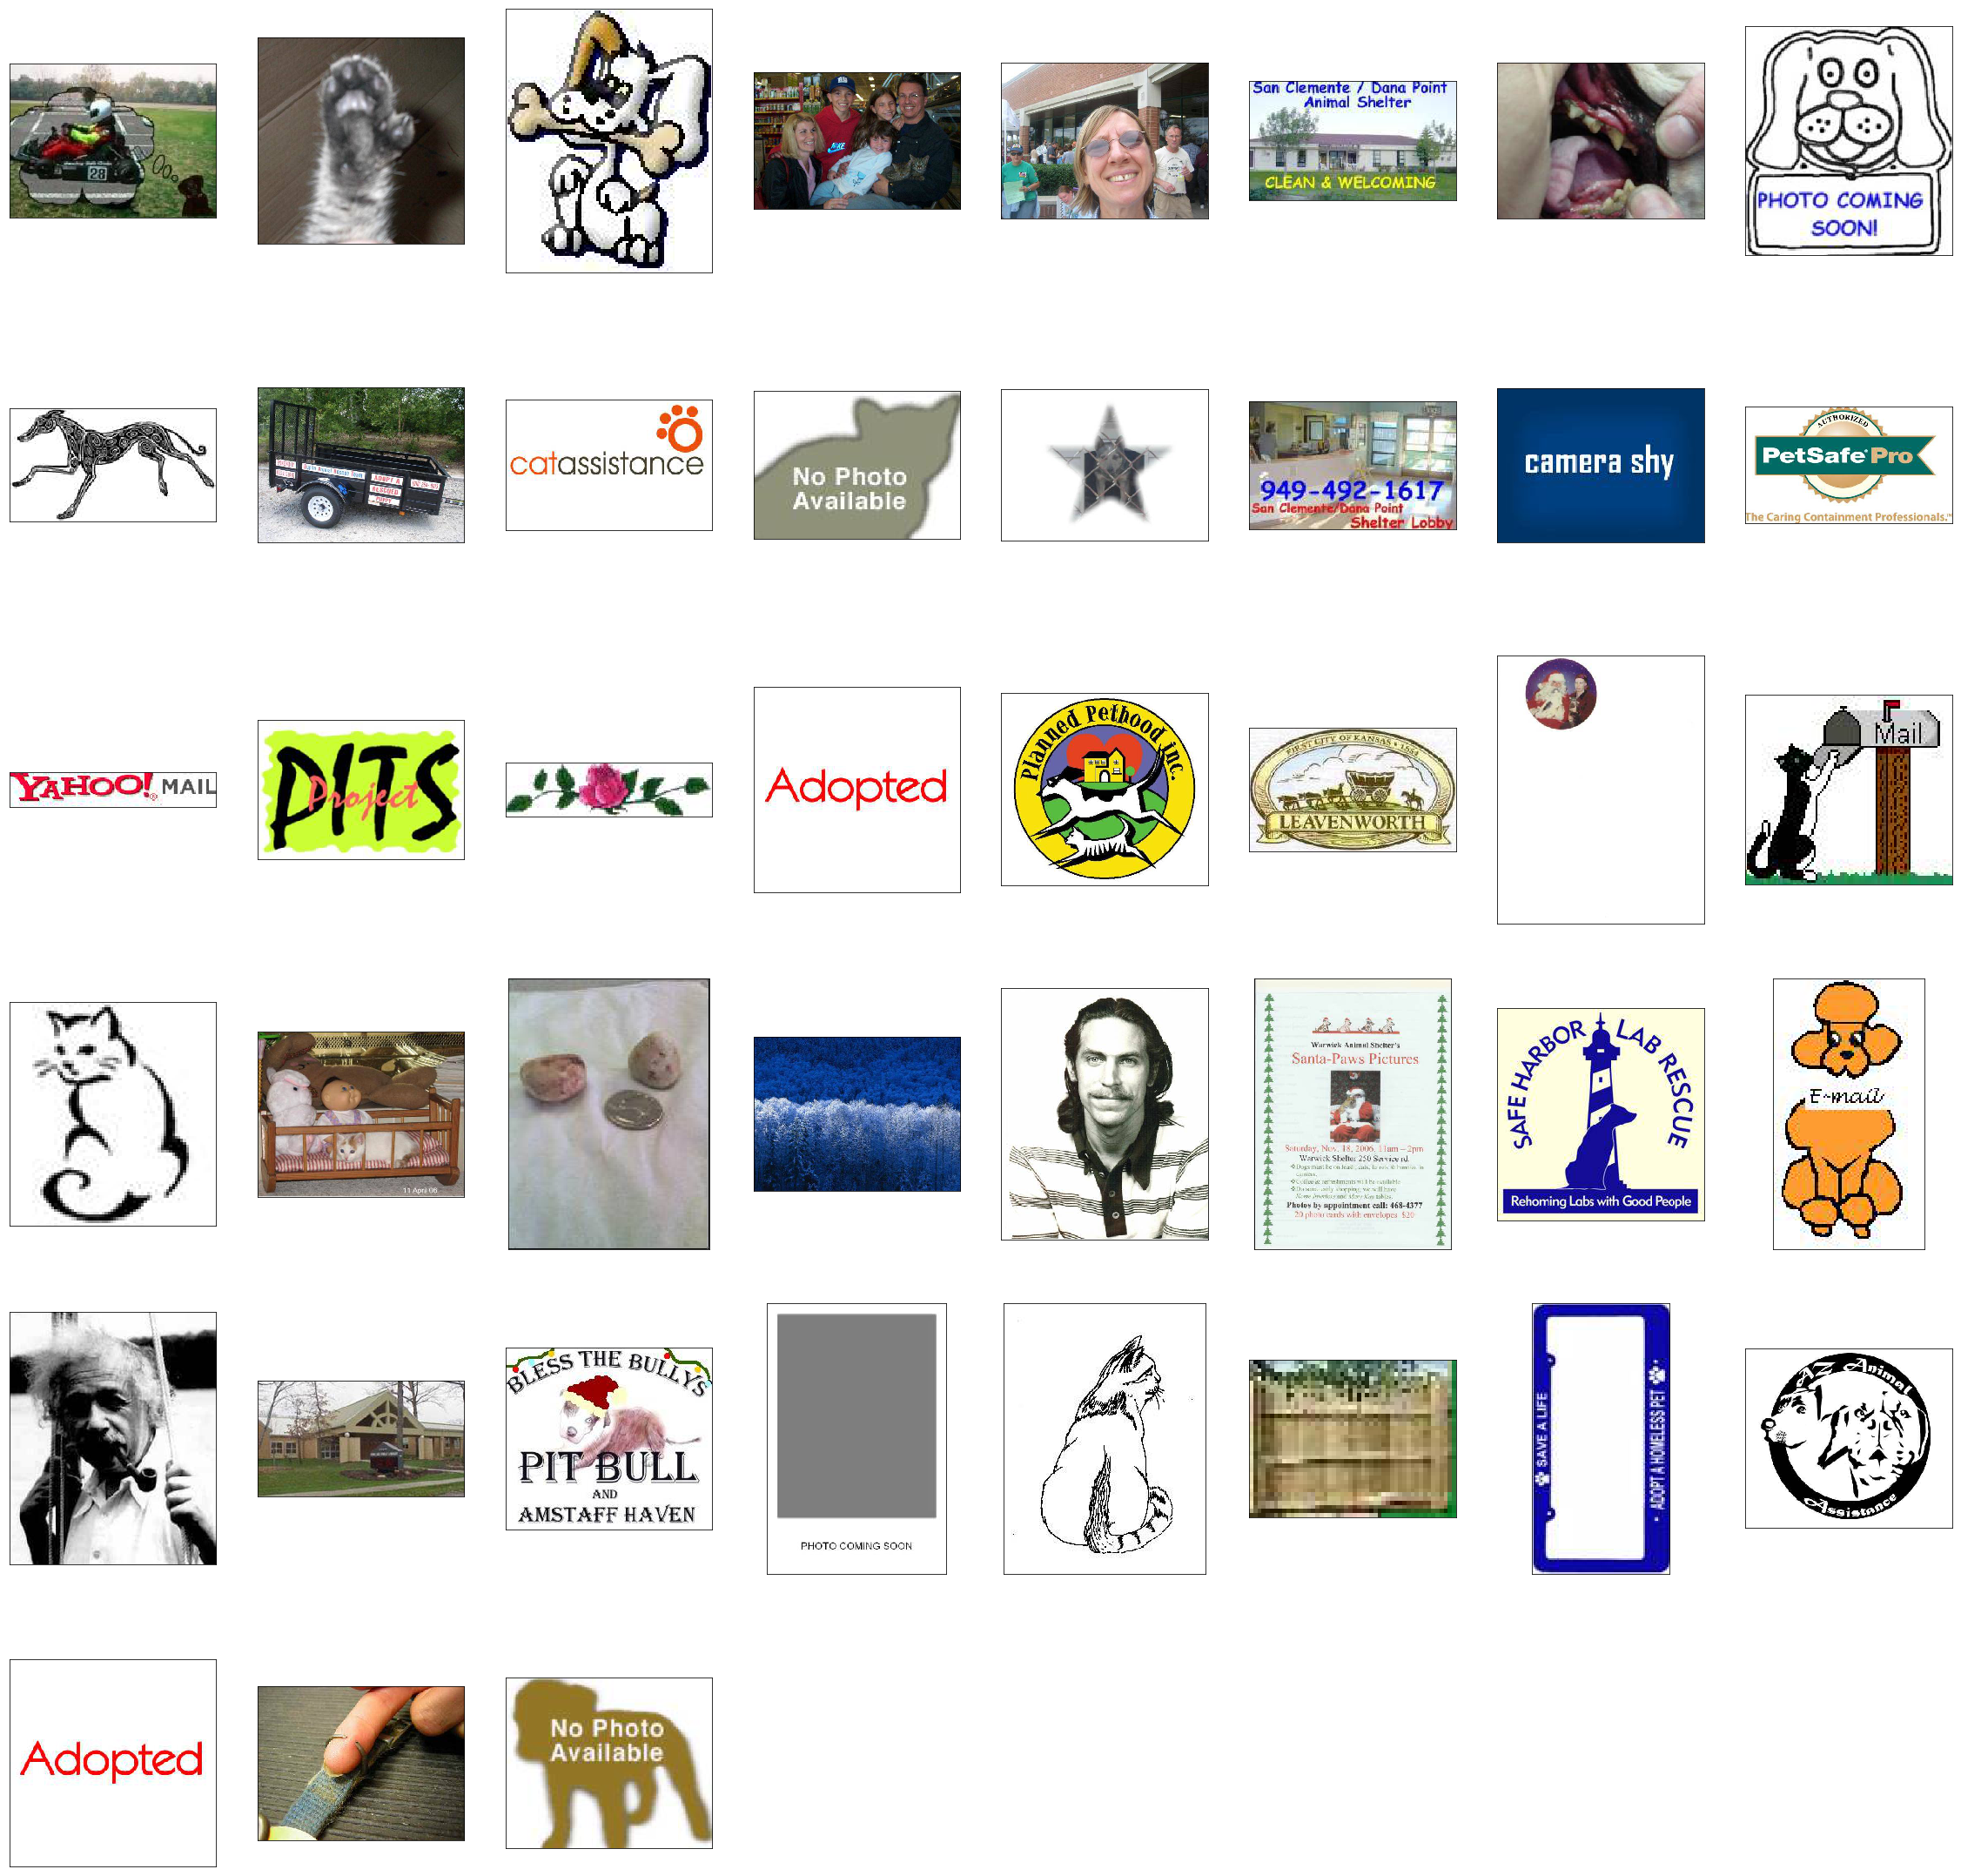

In [29]:
fig = plt.figure(figsize=(40,40))
for i, val in enumerate(abnormal_pic_list):
    ax = fig.add_subplot(6, 8, i + 1, xticks=[], yticks=[])
    abnormal_img = Image.open(val) 
    # 异常图片名称,待添加
    ax.imshow(abnormal_img)

数据集清洗后，猫的数量：12482，狗的数量：12475，测试集图片数量：12500。     
利用train中的数据随机抽取20%建立验证集。
根据模型要求，在图片输入到模型之前需要进行归一化，具体工作如下：      
在 Keras 中，CNN 的输入是一个4维数组（也被称作4维张量），它的各维度尺寸为 (nb_samples, rows, columns, channels)。其中 nb_samples 表示图像（或者样本）的总数，rows, columns, 和 channels 分别表示图像的行数、列数和通道数。         
本次使用path_to_tensor函数实现将彩色图像的字符串型的文件路径作为输入，返回一个4维张量，作为Keras CNN输入。因为我们的输入图像是彩色图像，因此它们具有三个通道。该函数首先读取一张图像，然后将其缩放为指定大小的图像（例如299×299）,随后,该图像被调整为具有4个维度的张量。对于任一输入图像，最后返回的张量的维度是：(1, 299, 299, 3)。paths_to_tensor 函数将图像路径的字符串组成的 numpy 数组作为输入，并返回一个4维张量，各维度尺寸为 (nb_samples, 299, 299, 3)。 在这里，nb_samples是提供的图像路径的数据中的样本数量或图像数量。     
对于通过上述步骤得到的四维张量，在把它们输入到Keras中InceptionResNetV2，InceptionV3，ResNet50，Xception预训练模型之前，还需要进行一些额外的处理：    
- 首先，这些图像的通道顺序为RGB，我们需要重排他们的通道顺序为BGR。    
- 其次，对这些图像的张量进行归一化。     
在这里我们利用各个预训练模型提供的preprocess_input函数实现了以上要求的归一化工作。

### 执行过程
#### 生成迁移学习特征向量####
InceptionResNetV2,Xception，InceptionV3这三个模型对于输入图片都有各自的默认值，InceptionResNetV2、Xception 和 InceptionV3 默认输入图片大小是(299,299)，在将图片输入模型前，首先使用每个模型的预处理函数 preprocess_input，将数据处理成该模型的标准输入。    
常见的卷积神经网络结构在前面的若干层都是卷积池化层及其各种变种，后面几层都是全连接层，这些全连接层之前的网络层被称为瓶颈层 (bottleneck). 将新的图片通过训练好的卷积神经网络直到瓶颈层的过程可以看做是对图像进⾏特征提取的过程。⼀般情况下，为了减少内存的消耗， 加快计算的过程，再将瓶颈层的结果输入全连接层之前，做⼀次全局平均池化，为数据下一步进入定制层进行降维，加快速度的同时，也降低过拟合的程度。在经过全局平均池化后，每个模型都将图片处理成⼀个行向量。在得到提取的迁移学习特征向量后，将数据存入npz文件中，待后续使用。     
以下为生成迁移学习特征向量相关函数代码：

#### 载入特征向量####

经过上面的代码运算，得到特征向量，分别是：
- cat_dog_Xception.npz；
- cat_dog_InceptionResNetV2.npz；
- cat_dog_InceptionV3.npz；   
下一步需要载⼊这些特征向量，通过np.concatenate函数进行连接将它们合成⼀条特征向量，然后把训练集顺序打乱。        

通过运行`X_train, y_train = shuffle(X_train, y_train)`将训练集中的数据打乱。   
#### 构建模型####
构建定制的模型，载入预处理的特征向量数据，对数据进行概率为0.1的'dropout'，连接输出层，激活函数为Sigmoid，输出2个类别各自可能的概率，本次的优化器采用为'Adadelta'，损失函数为'binary_crossentropy',评判使用'accuracy'。

#### 训练模型####

以下是训练模型，对模型进行10次训练，将最优模型保存在'data/model.weights.best.hdf5'中。

#### 预测测试集####
预测这里我们用到了一个小技巧，我们将每个预测值限制到了 [0.005, 0.995] 个区间内，这个原因很简单，kaggle 官方的评估标准是 LogLoss，对于预测正确的样本，0.995 和 1 相差无几，但是对于预测错误的样本，0 和 0.005 的差距非常大。    
此处采用了[手把手教你如何在Kaggle猫狗大战冲到Top2%](https://zhuanlan.zhihu.com/p/25978105?utm_medium=social&utm_source=weibo)中的建议。

### 完善
本次从初始开始，主要完善并修改了以下几部分：
- 特征向量提取模型选择：在其他条件一致的情况下，单独使用一种特征向量训练和使用三种向量连接为一个向量后进行训练，分别比较各自验证集的loss值，依据以下列表，选择loss值最低者，即三种特征向量连接方式为最优模型；  
![title](img/b1.png)

- 在其他条件不变的情况下，对数据的定制层进行调整：分别设置'dropout'为0，0.1, 0.5，0.9,根据以下列表中loss的情况，选择最优选项，即'dropout'为0.1；
![title](img/b2.png)

- 在其他条件不变的情况下，对模型的优化器进行调整，选用了'Adam'/'Adadelta'/'RMSprop'/'SGD',最终发现'Adadelta'效果最好，以下为对比；
![title](img/b3.png)

- 在其他条件不变的情况下，对模型的batch_size进行了调整，分别测试了1024、512、128、32，总结如下：     
**1.增大batch_size值，提高了内存的利用率，大矩阵乘法的并行化效率提高。   
2.增大batch_size值，跑完一次epoch所需要的迭代次数减少，相同数据量的数据处理速度加快。     
3.增大batch_size值，Batch_size越大下降方向越准，引起的训练震荡越小。     
4.过大的batch_size值，会带来内存溢出、训练时间增加、收敛缓慢、局部最优，泛化性差等问题    
5.过小的Batch_size值，修正方向以各自样本的梯度方向修正难以达到收敛。**      
根据以上总结，batch_size值需要根据模型的情况进行一些调整，针对此次问题，最终优选512；

- 在其他条件不变的情况下，设置模型学习率，以下为不同学习率情况下模型的收敛情况,选择最优参数：
![title](img/ir.png)




## IV. 结果

### 模型的评价与验证

![title](img/jieguo.jpg)
在验证集上达到了99.59%的准确率loss为0.0140，
训练过程中的 loss 和 accuracy 如下：
![title](img/11.png)
![title](img/22.png)

将测试集的处理结果提交到kaggle上，loss为0.03785。
![title](img/a5.jpg)

通过以上可视化的分析，训练集和验证机的损失函数曲线变化的收敛程度是相同的，而且是稳定的，最终都到达了损失函数特别低的程度，并基本重合，所以表明模型对于这个问题是足够稳健可靠，训练数据或输入的一些微小的改变不会极大影响结果。测试集的预测结果上传至kaggle上评分，loss为0.03785，说明这个模型得出的结果是可信的。    

### 合理性分析


![title](img/b1.png)
三个预训练模型通过组合，优于其他的情况。           
更多的层数，不同的卷积核各种各样的的组合，可以更好的抽取图片中的泛化特征，这样既可以提高分类的准确率，又可以降低模型的过拟合风险，所以现在在各种比赛中斩头露角的神经网络层数都⾮常的多，深度很深，这也是类似的神经网络被称为深度学习的⼀个主要原因。     
Xception，InceptionV3，InceptionResNetV2这三个模型进行组合迁移学习，效果比先单个神经网络模型效果好。这里利用了bagging的思想（是一种用来提高学习算法准确度的方法，这种方法通过构造一个预测函数系列，然后以一定的方式将它们组合成一个预测函数），通过多个模型处理数据并进行组合，可以有效降低模型的方差，减少过拟合程度，提高分类准确率。          
通过上传预测结果数据到kaggle上进行打分，结果已完全说明此模型的预测结果完全满足前面设定的基准模型的要求，确确实实解决了此次的问题。    

## V. 项目结论

### 结果可视化

![title](img/jieguo.png)

![title](img/model.jpg)

图片上方的概率表示的是图片中是狗的概率，越接近1表示为狗，越接近0预测为猫。并且从kaggle上的得分结果，充分说明了此次训练出的CNN模型对于图片预测准确度是相当高的。从模型概况图也充分说明了合理性分析中的相关理论，完全能达到项目的要求。

### 对项目的思考

深度学习卷积神经网络毫无疑问是处理图像问题最佳的机器模型，近年来各大赛的前几名均是通过深度学习获取好成绩。本项目首先对训练数据中的异常数据进行了清理，生成了随机的训练集和验证集，在图片输入预处理模型前对图像进行了归一化，之后利用现有的优秀预处理模型对数据进行了特征向量的提取，本次选用了Xception、InceptionV3 和InceptionResNetV2三个模型，之后对三组特征向量进行了组合，并对单独使用一组特征向量和组合后的特征向量的数据输入定制模型中进行训练，最终比较发现此次项目选用Xception、InceptionV3，InceptionResNetV2三组特征项目组成的模型，在最终预测中得分最高。   
在此次的项目试验中，我也陷入了困境，无数次的对三个特征向量组合成的特征向量进行训练，调整了定制层的深度、激活函数等，调整了优化器、评判标准等，并不断的修正代码，但是最终也无法降低模型的损失函数，3个特征向量组合的模型，损失函数一直很高，而且不收敛，在这种情况下困惑了10几天，最终通过调整模型的学习率后，使模型开始收敛。通过此次的项目和困惑，也充分认识到深度学习这门计算机技术，应更注重于实践的结果，实践结果是验证模型最好的方式，而不像传统计算机编程技术，注重的是代码的逻辑性。在深度学习中，实验占第一位，代码逻辑在第二位。本次项目只是使用Xception、InceptionV3、InceptionResNetV2 三个模型进行实验，并且只是简单的拼接，忽略了特征之间的位置关系，除了这三个模型，还可以选择更多新的模型，或者使用stacking的方法进行模型融合，进⼀步降低方差，寻找网络复杂度与模型负面影响最低化的方案，提高分类的准确率。在下一步加入图片增强的技术，进一步的提高模型的预测准确度。   
最终模型和结果完全符合我对这个问题的期望，我认为它完全可以在通用的场景下解决这些类型。   

### 需要作出的改进

本次的项目我使用的是Keras框架，其实Keras框架的基础是TensorFlow，为了提高运算的速度，下一次我应该学习TensorFlow语法，直接使用google公司提供的更加先进的方法，利用TensorFlow来训练模型。    
由于本次项目Keras框架对NASNetLarge模型的支持存在部分问题，无法利用这个被现今誉为最好的CNN模型，在下一步中，我可能利用此模型进一步提高我的模型的准确度。    
在此次的执行流程中，没有加入k-折叠交叉验证和图像增强的技术，在下一步的完善中，通过加入这两种技术也将进一步提高我的模型的准确度。    



In [14]:
from PIL import Image
from glob import glob
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline 
def scatter_plot(files, flor):
    size = []
    for pic in files:
        img = Image.open(pic)
        size.append(img.size)
        size_1 = np.array(size)
    plt.figure(figsize=(5,5))
    plt.plot(size_1[:, 0], size_1[:, 1], 'ro')
    plt.grid(True)
    plt.xlabel('width')
    plt.ylabel('height')
    plt.title('Scatter plot of image size in ' + flor + ' dataset')

In [6]:
# from PIL import Image
# import os
# import numpy as np
# # 提供文件和文件集合的高级操作，复制、删除等
# import shutil
# # 导入计数
# from collections import Counter
# # 文件操作模块
# from glob import glob
# from keras.preprocessing import image
# from keras.applications.resnet50 import ResNet50
# from keras.applications.resnet50 import preprocess_input as preprocess_input_ResNet50
# from keras.applications.xception import Xception
# from keras.applications.xception import preprocess_input as preprocess_input_Xception
# from keras.applications.inception_v3 import InceptionV3
# from keras.applications.inception_v3 import preprocess_input as preprocess_input_InceptionV3
# from keras.preprocessing.image import ImageDataGenerator
# from keras.models import Sequential
# from keras.layers import  Dense, Dropout
# from keras.callbacks import ModelCheckpoint 
# from keras.models import Model
# from keras.layers import Dense, GlobalAveragePooling2D
# from keras.utils import np_utils
# import pandas as pd
# import re
# import matplotlib.pyplot as plt
# %matplotlib inline 

In [2]:
# # 利用直方图，计算图片中的色彩与图片像素的比值函数

# def calhistogram(file):
#     # 打开图片
#     img = Image.open(file)
#     # 直方图
#     his = img.histogram()
#     # 计算色彩的数量
#     count = Counter(his)
#     # 计算色彩数量和图片像素的比值
#     return float(len(count))/len(his)
# # 建立所有图片色彩和图片像素的比值的list
# color_pixel_ratio_list = []
# for train_file in files:
#     color_pixel_ratio_list.append(calhistogram(train_file))
# # 第一四分位数
# Q1 = np.percentile(color_pixel_ratio_list, [25])
# # 第三四分位数
# Q3 = np.percentile(color_pixel_ratio_list, [75])
# # 四分位距IQR
# IQR = Q3 - Q1

# # 异常值1
# abnormal_1 = Q1 - 1.5 * IQR
# # 异常值2
# abnormal_2 = Q3 + 1.5 * IQR
# print(Q1, Q3, IQR)

In [7]:
# 创建图片色彩和图片像素的比值和图片地址的dict
color_pixel_dict = dict(zip(color_pixel_ratio_list,files))

In [7]:
import ipywidgets as widgets
from IPython.display import display, HTML
javascript_functions = {False: "hide()", True: "show()"}
button_descriptions  = {False: "Show code", True: "Hide code"}
def toggle_code(state):
    output_string = "<script>$(\"div.input\").{}</script>"
    output_args   = (javascript_functions[state],)
    output        = output_string.format(*output_args)
    display(HTML(output))
def button_action(value):
    state = value.new
    toggle_code(state)
    value.owner.description = button_descriptions[state]
state = False
toggle_code(state)
button = widgets.ToggleButton(state, description = button_descriptions[state])
button.observe(button_action, "value")
display(button)